<a href="https://colab.research.google.com/github/adity1997/Fashion_MNIST_CNN/blob/main/Fashion_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
#For functional API not using sequintial but also we can try sequential so we can create both models, just getting hang at both the models syntax
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [ ]:
#Loading Dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train,y_train), (x_test,y_test) = fashion_mnist.load_data()

In [ ]:
x_train, x_test = x_train/255.0 , x_test/255.0
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


In [ ]:
#Changing the dimensions of x_train and x_test as the model takes 3-D inputs
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)
print(x_train.shape)

(60000, 28, 28, 1)


In [ ]:
#No. feattures
K = len(set(y_train))
print(f"Number of Classes:{K}")

Number of Classes:10


In [ ]:
#Models
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [ ]:
#Compile and Fit
model.compile(optimizer='adam',loss='SparseCategoricalCrossentropy', metrics=['accuracy'])
r = model.fit(x_train, y_train,validation_data=(x_test,y_test), epochs = 15)

Epoch 1/15
1875/1875 [==============================] - 36s 19ms/step - loss: 0.5119 - accuracy: 0.8090 - val_loss: 0.4232 - val_accuracy: 0.8406
Epoch 2/15
1875/1875 [==============================] - 33s 17ms/step - loss: 0.3537 - accuracy: 0.8689 - val_loss: 0.3670 - val_accuracy: 0.8684
Epoch 3/15
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3047 - accuracy: 0.8853 - val_loss: 0.3275 - val_accuracy: 0.8794
Epoch 4/15
1875/1875 [==============================] - 33s 17ms/step - loss: 0.2697 - accuracy: 0.8984 - val_loss: 0.2920 - val_accuracy: 0.8930
Epoch 5/15
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2441 - accuracy: 0.9072 - val_loss: 0.3114 - val_accuracy: 0.8844
Epoch 6/15
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2212 - accuracy: 0.9163 - val_loss: 0.2955 - val_accuracy: 0.8990
Epoch 7/15
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2046 - accuracy: 0.9217 - val_loss: 0.3066 -

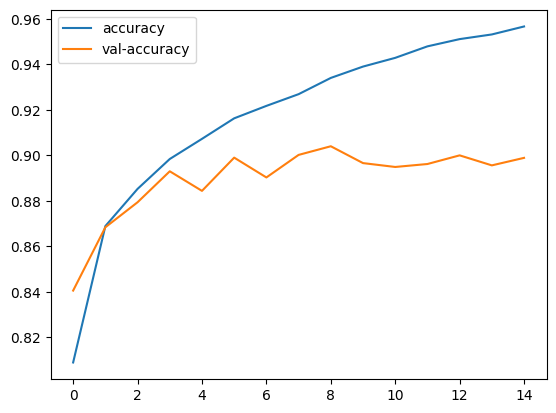

In [14]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val-accuracy')
plt.legend()

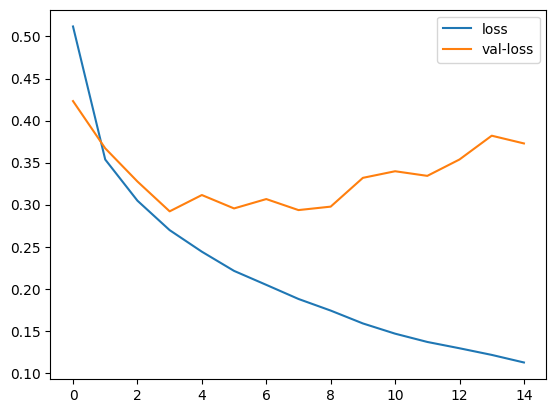

In [15]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val-loss')
plt.legend()